   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">

</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: Data Science </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">CA6-Introduction to Data Science</h1>
        <h1 style="font-family: Georgia; color: black; text-align: center; ">Team memebers:</h1>

</div>

<div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Shahzad Momayez- 810100272 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- 810100084 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Amir Mahdi Farzaneh- 810100194 </h1>

</div>
   </html>

# Introduction
In this phase, we aim to analyze our dataset further and get a deeper understanding, so that
it can help us in the next phase. Analyzing the variables and their relationship would probably
help you a lot in achieving the insight you’ll need.

# what is EDA?
Exploratory Data Analysis (EDA) is a crucial step in the data analysis process where analysts use various techniques to understand and summarize the main characteristics of a dataset. EDA involves both graphical and quantitative methods to identify patterns, detect anomalies, test hypotheses, and check assumptions.$

### Key Objectives of EDA:

1. **Understanding the Data Structure**: To get a basic understanding of the dataset, including its size, shape, and data types.
2. **Summarizing Data**: To compute summary statistics (e.g., mean, median, mode, standard deviation) for understanding the distribution and central tendency of the data.
3. **Detecting Outliers and Anomalies**: To identify unusual data points that may need further investigation or preprocessing.
4. **Visualizing Data**: To create visual representations (e.g., histograms, scatter plots, box plots) that help in understanding the data distribution and relationships between variables.
5. **Identifying Patterns and Relationships**: To uncover hidden patterns and relationships in the data that might not be obvious through summary statistics alone.
6. **Preparing Data for Modeling**: To clean and preprocess the data, making it ready for building predictive models.

### Common Techniques and Tools in EDA:

1. **Summary Statistics**:
   - **Descriptive statistics**: Mean, median, mode, variance, standard deviation.
   - **Frequency tables** and **cross-tabulations**: To understand the distribution of categorical variables.

2. **Data Visualization**:
   - **Histograms**: To visualize the distribution of a single numeric variable.
   - **Box plots**: To identify outliers and understand the spread of the data.
   - **Scatter plots**: To explore relationships between two numeric variables.
   - **Bar charts**: To visualize the distribution of categorical variables.
   - **Heatmaps**: To visualize correlation matrices and identify relationships between variables.

3. **Data Cleaning**:
   - Handling missing values.
   - Detecting and correcting errors or inconsistencies.
   - Dealing with outliers and unusual data points.

4. **Transformations**:
   - Applying mathematical transformations (e.g., log, square root) to normalize data and stabilize variance.
   - Encoding categorical variables (e.g., one-hot encoding).

5. **Hypothesis Testing**:
   - Performing statistical tests to validate assumptions about the data, such as t-tests, chi-square tests, and ANOVA.

### Tools for EDA:

- **Python Libraries**: Pandas, NumPy, Matplotlib, Seaborn, Plotly.
- **R Packages**: ggplot2, dplyr, tidyr, data.table.
- **Software**: Excel, Tableau, Power BI for interactive data exploration and visualization.

### Example Workflow:

1. **Loading Data**: Import the dataset from various sources (e.g., CSV files, databases).
2. **Initial Exploration**: View the dataset’s structure, data types, and summary statistics.
3. **Visualization**: Create plots to visualize data distributions and relationships.
4. **Data Cleaning**: Handle missing data and outliers, correct inconsistencies.
5. **Feature Engineering**: Create new features and transform existing ones.
6. **Hypothesis Testing**: Conduct tests to validate data assumptions.

### Benefits of EDA:

- **Insight Generation**: Helps in generating insights and understanding the underlying structure of the data.
- **Data Quality Assurance**: Identifies data quality issues such as missing values, outliers, and inconsistencies.
- **Model Preparation**: Provides the foundation for building predictive models by selecting and transforming features appropriately.
- **Assumption Checking**: Verifies the assumptions required for the application of various statistical methods and models.

In summary, EDA is an iterative and open-ended process that involves constant probing and questioning of the data to extract meaningful insights and prepare it for further analysis or modeling.

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('hotels_in_europe.xls').drop(columns= ["Unnamed: 0.1" , "Unnamed: 0"])

In [3]:
df.columns

Index(['name', 'location', 'price', 'rating', 'quality', 'review', 'bed',
       'distance from centure', 'room_type', 'nights', 'adults', 'city',
       'neighbourhood', 'quality_val', 'nights2', 'adults2', 'review2',
       'price2', 'bed2', 'dfc'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   598 non-null    object 
 1   location               598 non-null    object 
 2   price                  598 non-null    object 
 3   rating                 598 non-null    float64
 4   quality                598 non-null    object 
 5   review                 598 non-null    object 
 6   bed                    598 non-null    object 
 7   distance from centure  598 non-null    float64
 8   room_type              598 non-null    object 
 9   nights                 598 non-null    object 
 10  adults                 598 non-null    object 
 11  city                   598 non-null    object 
 12  neighbourhood          598 non-null    object 
 13  quality_val            598 non-null    float64
 14  nights2                598 non-null    int64  
 15  adults

In [5]:
df.describe()

,rating,distance from centure,quality_val,nights2,adults2,review2,price2,bed2,dfc
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,8.319064,5.562375,2.270067,1.469900,1.511706,4831.324415,305.235786,1.221572,5.562375
std,0.548765,37.525590,0.748074,0.499511,0.500281,5276.075702,263.041015,0.701859,37.525590
min,4.900000,0.100000,1.000000,1.000000,1.000000,5.000000,20.000000,1.000000,0.100000
25%,8.100000,0.600000,2.000000,1.000000,1.000000,1229.000000,124.000000,1.000000,0.600000
50%,8.400000,1.500000,2.000000,1.000000,2.000000,2918.000000,217.000000,1.000000,1.500000
75%,8.700000,2.500000,3.000000,2.000000,2.000000,6924.500000,444.500000,1.000000,2.500000
max,9.600000,450.000000,4.000000,2.000000,2.000000,28926.000000,2777.000000,6.000000,450.000000


# preprocess

--------------------------------------------------------------------------------------------------------

.The given code snippet is a part of a data manipulation process using the Pandas library in Python. It focuses on extracting specific components from a string column in a DataFrame and creating new columns based on these components. this "location" coulumn containd 2 different information about the neighborhood and the city. so we replace "location" with 2 different columns:
1) neighborhood 
2) city

In [6]:
df['city'] = df['location'].str.split().str[-1]

In [7]:
df['neighbourhood'] = df['location'].str.split(',').str[0]

In [8]:
unique_values = df['quality'].unique()
print(unique_values)

['Fabulous' 'Very good' 'Good' 'Superb' 'Exceptional' 'Guest rating'
 'Review score']


In [9]:
sorted_df = df.sort_values(by='rating', ascending=True)

In [10]:
mapping = {'Review score' : 0, "Guest rating" : 0 ,'Good' : 1, 'Very good' : 2,'Fabulous' : 3, 'Superb' : 4 , 'Exceptional' : 5}
df['quality_val'] = df['quality'].map(mapping)

In [11]:
df['nights2'] = pd.to_numeric(df['nights'].str.split().str[0])
df['adults2'] = pd.to_numeric(df['adults'].str.split().str[0])

In [12]:
# df['bed2'] = pd.to_numeric(df['bed'].str.split().str[0])
df['review'] = df['review'].str.replace(',', '')
df['price'] = df['price'].str.replace(',', '')
df['review2'] = pd.to_numeric(df['review'].str.split().str[0])
df['price2'] = pd.to_numeric(df['price'].str.split("$").str[1])

In [13]:
df['bed2'] = pd.to_numeric(df['bed'].str.split().str[0], errors='coerce')

In [14]:
df['rating'] = pd.to_numeric(df['rating'])

In [15]:
df['dfc'] = pd.to_numeric(df['distance from centure'])

In [16]:
numerical_df = df.select_dtypes(include=[int, float])

In [17]:
def fill_nan(main_df):
    try:
      main_df_without_null = main_df.drop("size", axis=1)
      main_df_without_null = main_df_without_null.drop("free_canelation", axis=1)
    except:
      main_df_without_null = main_df

    main_df_without_null['bed2'].fillna(main_df_without_null['bed2'].median(), inplace=True)
    main_df_without_null['quality_val'].fillna(main_df_without_null['quality_val'].median(), inplace=True)
    main_df_without_null.head()
    main_df_without_null.isna().sum()
    return main_df_without_null

In [18]:
df = fill_nan(df)

In [19]:
df.isna().sum()

name                     0
location                 0
price                    0
rating                   0
quality                  0
review                   0
bed                      0
distance from centure    0
room_type                0
nights                   0
adults                   0
city                     0
neighbourhood            0
quality_val              0
nights2                  0
adults2                  0
review2                  0
price2                   0
bed2                     0
dfc                      0
dtype: int64

# Visualization

In [20]:
df.drop(columns = ["location" , "price" , "nights" , "adults" , "review" , "bed" , 'distance from centure' ] , inplace = True)

In [21]:
df.rename(columns={"nights2" : "nights", "adults2" : "adults","review2" : "review","price2" : "price","bed2" : "bed"}, inplace=True)

In [22]:
df.columns = df.columns.str.replace('2$', '')
numerical_df = df.select_dtypes(include=[int, float])

C:\Users\a\AppData\Local\Temp\ipykernel_18904\3147147941.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('2$', '')


In [23]:
df.describe()

,rating,quality_val,nights,adults,review,price,bed,dfc
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,8.319064,2.225753,1.469900,1.511706,4831.324415,305.235786,1.153846,5.562375
std,0.548765,0.862899,0.499511,0.500281,5276.075702,263.041015,0.641718,37.525590
min,4.900000,0.000000,1.000000,1.000000,5.000000,20.000000,1.000000,0.100000
25%,8.100000,2.000000,1.000000,1.000000,1229.000000,124.000000,1.000000,0.600000
50%,8.400000,2.000000,1.000000,2.000000,2918.000000,217.000000,1.000000,1.500000
75%,8.700000,3.000000,2.000000,2.000000,6924.500000,444.500000,1.000000,2.500000
max,9.600000,5.000000,2.000000,2.000000,28926.000000,2777.000000,6.000000,450.000000


In [34]:
# Group by 'city' and calculate mean price and rating
funcs = ['mean' , "max" , "min" , "std" , "median"]
city_group = df.groupby('city').agg({'price': funcs , 'rating': funcs, 'quality_val': funcs , 'dfc' : funcs , 'review' : funcs})
city_group


price                                 rating                      \
              mean   max min         std median      mean  max  min       std   
city                                                                            
Berlin  177.061644   464  20   97.430875  149.0  8.114384  8.9  6.3  0.550610   
London  306.217391  1220  61  270.996640  189.0  8.332609  9.6  6.1  0.635812   
Madrid  336.301282   866  27  220.895726  240.5  8.562179  9.3  7.4  0.321357   
Paris   392.145570  2777  26  343.856525  312.0  8.256329  9.6  4.9  0.555509   

               ...        dfc                                     review  \
       median  ...       mean    max  min        std median         mean   
city           ...                                                         
Berlin    8.2  ...   1.650000   10.8  0.3   1.493122   1.30  7038.321918   
London    8.5  ...   5.219565  350.0  0.2  29.656185   2.05  4153.065217   
Madrid    8.6  ...  13.452564  450.0  0.1  67.462176   0.40  5724.141026   
Paris     8.3  ...   1.686709    3.2  0.4   0.800247   1.80  2502.835443   

                                        
          max min          std  median  
city                                    
Berlin  23526  38  5488.455992  4924.0  
London  25131   5  5564.850354  1488.0  
Madrid  28926  19  5769.788725  4157.0  
Paris   11095   7  2638.045819  1496.0  

[4 rows x 25 columns]

In [35]:
room_type_group = df.groupby('room_type').agg({'price': funcs , 'rating': funcs, 'quality_val': funcs , 'dfc' : funcs , 'review' : funcs})
room_type_group

price              \
                                                           mean   max   min   
room_type                                                                     
"Cosy" Room                                          510.333333   626   279   
ALWAYS ME Courtyard Views                            670.000000   670   670   
Always ME                                            876.000000   876   876   
Art Deco Queen, Guest room, 1 Queen                 2777.000000  2777  2777   
Bed 8-Bed Mixed Dormitory Room with Private Bat...    23.000000    23    23   
...                                                         ...   ...   ...   
Triple Room                                          144.000000   144   144   
Twin Room                                            380.695652   866    57   
Two-Bedroom Apartment                                234.000000   234   234   
Urban Premium Studio                                  81.000000    81    81   
Z Inside Double (without a window)                    89.000000    89    89   

                                                                        \
                                                           std  median   
room_type                                                                
"Cosy" Room                                         200.340543   626.0   
ALWAYS ME Courtyard Views                                  NaN   670.0   
Always ME                                                  NaN   876.0   
Art Deco Queen, Guest room, 1 Queen                        NaN  2777.0   
Bed 8-Bed Mixed Dormitory Room with Private Bat...         NaN    23.0   
...                                                        ...     ...   
Triple Room                                                NaN   144.0   
Twin Room                                           229.427040   380.0   
Two-Bedroom Apartment                                      NaN   234.0   
Urban Premium Studio                                       NaN    81.0   
Z Inside Double (without a window)                    0.000000    89.0   

                                                      rating            \
                                                        mean  max  min   
room_type                                                                
"Cosy" Room                                         8.066667  8.1  8.0   
ALWAYS ME Courtyard Views                           8.400000  8.4  8.4   
Always ME                                           8.500000  8.5  8.5   
Art Deco Queen, Guest room, 1 Queen                 8.600000  8.6  8.6   
Bed 8-Bed Mixed Dormitory Room with Private Bat...  7.500000  7.5  7.5   
...                                                      ...  ...  ...   
Triple Room                                         6.900000  6.9  6.9   
Twin Room                                           8.413043  8.9  7.1   
Two-Bedroom Apartment                               7.400000  7.4  7.4   
Urban Premium Studio                                8.600000  8.6  8.6   
Z Inside Double (without a window)                  8.300000  8.4  8.1   

                                                                     ...  \
                                                         std median  ...   
room_type                                                            ...   
"Cosy" Room                                         0.057735    8.1  ...   
ALWAYS ME Courtyard Views                                NaN    8.4  ...   
Always ME                                                NaN    8.5  ...   
Art Deco Queen, Guest room, 1 Queen                      NaN    8.6  ...   
Bed 8-Bed Mixed Dormitory Room with Private Bat...       NaN    7.5  ...   
...                                                      ...    ...  ...   
Triple Room                                              NaN    6.9  ...   
Twin Room                                           0.483646    8.4  ...   
Two-Bedroom Apartment                    

In [36]:
city_naib_group = df.groupby(['city' , "neighbourhood"]).agg({'price': funcs , 'rating': funcs, 'quality_val': funcs , 'dfc' : funcs , 'review' : funcs})
city_naib_group

price                                \
                                         mean   max  min         std median   
city   neighbourhood                                                          
Berlin Charlottenburg              325.000000   325  325         NaN  325.0   
       Charlottenburg-Wilmersdorf  195.333333   377   61  117.200165  178.5   
       Friedrichshain-Kreuzberg    134.352941   382   23   91.025368  101.0   
       Lichtenberg                  76.500000    81   72    6.363961   76.5   
       Mitte                       186.812500   464   20   98.593083  156.5   
       Neukölln                    101.000000   139   63   53.740115  101.0   
       Prenzlauer Berg             244.000000   244  244         NaN  244.0   
       Tempelhof-Schöneberg        170.307692   234   81   59.773719  187.0   
       Treptow-Köpenick             75.500000    76   75    0.707107   75.5   
London Brent                       124.800000   170   97   34.028746  102.0   
       Camden                      198.857143   736   89  237.322164  115.0   
       City of London              432.375000   603  160  170.610616  456.0   
       Greenwich                   148.000000   171  125   26.558112  148.0   
       Hammersmith and Fulham      127.166667   189   63   67.783233  129.5   
       Islington                   268.800000   501  102  168.285340  186.0   
       Kensington and Chelsea      217.200000   378  148   91.480599  189.0   
       Lambeth                     317.250000   762   90  291.127243  208.5   
       London                      183.000000   252  114   62.284294  206.0   
       Muswell Hill                151.000000   159  135   13.856406  159.0   
       Newham                       83.000000    83   83    0.000000   83.0   
       Southwark                   253.375000   366  117  121.384793  263.5   
       Tower Hamlets               203.500000   456   61  127.351573  203.0   
       Westminster Borough         492.255814  1220   83  358.129804  482.0   
Madrid Barajas                     354.888889   566  152  193.683017  222.0   
       Centro                      336.769231   866   27  232.658433  257.0   
       Chamartín                   352.666667   586  236  202.072594  236.0   
       Chamberi                    163.000000   163  163    0.000000  163.0   
       Ciudad Lineal               225.333333   538  110  134.183066  219.0   
       Fuencarral-El Pardo         507.600000   586  488   43.826932  488.0   
       Salamanca                   479.727273   802  183  244.128692  376.0   
       San Blas                    256.000000   466  197  117.573381  210.0   
       Tetuan                      193.000000   193  193    0.000000  193.0   
Paris  10th arr.                   104.666667   244   36   83.006024   70.0   
       11th arr.                   193.333333   210  185   14.433757  185.0   
       12th arr.                   348.500000   493  176  137.244639  404.0   
       13th arr.                   271.250000   312  149   81.500000  312.0   
       14th arr.                   121.500000   171  103   33.030289  106.0   
       15th arr.                   653.000000  1062  244  472.272520  653.0   
       16th arr.                   537.800000   574  393   80.945661  574.0   
       17th arr.                   479.375000  1084  150  395.080801  332.0   
       18th arr.                   292.142857   464  114  145.512232  205.0   
       19th arr.                   189.583333   315   26  111.187359  208.0   
       20th arr.                   390.333333   391  390    0.577350  390.0   
       2nd arr.                    326.500000   488  184  165.274519  317.0   
       3rd arr.                    342.666667   609  184  190.732142  236.0   
       4th arr.                    313.666667   388  165  128.749110  388.0   
       5th arr.                    470.000000   670  107  195.368882  457.0   
       6th arr.                    455.111111   626  188  136.349417  510.0   
       7th 

### Monte Carlo

Price Analysis: Monte Carlo simulation can help generate different possible price scenarios based on the variability in the data. This can help in predicting the range of prices for different combinations of variables.

In [24]:
num_simulations = 1000
simulated_prices = []
for _ in range(num_simulations):
    # Generating random samples for analysis
    simulated_prices.append(np.random.normal(df['price'].mean(), df['price'].std()))

simulated_prices_mean = np.mean(simulated_prices)
simulated_prices_std = np.std(simulated_prices)

print(f'Mean simulated price: {simulated_prices_mean}')
print(f'Standard deviation of simulated price: {simulated_prices_std}')

Mean simulated price: 294.20016478092447
Standard deviation of simulated price: 263.37614372750033


Quality Analysis: By simulating the quality variable in the DataFrame, Monte Carlo simulation can provide insights into the distribution of quality ratings, helping to identify patterns or outliers.

In [25]:
num_simulations = 1000

# Create empty lists to store simulation results
simulated_quality = []
for _ in range(num_simulations):
    # Generating random samples for analysis
    simulated_quality.append(np.random.choice(df['quality']))

# Analyze the simulated quality data
quality_counts = pd.Series(simulated_quality).value_counts()
quality_percentage = quality_counts / quality_counts.sum() * 100

print("Simulated Quality Distribution:")
print(quality_percentage)

Simulated Quality Distribution:
Very good       50.7
Fabulous        25.7
Good            13.6
Superb           6.2
Review score     1.7
Guest rating     1.4
Exceptional      0.7
dtype: float64


Based on the simulated quality distribution results, we can infer the following:

1. **Quality Ratings Distribution**: The majority of the simulated quality ratings fall into the categories of 'Very good' and 'Fabulous', with 47.6% and 31.8% respectively. This suggests that most of the simulated quality ratings tend to be positive or highly rated.

2. **Impact of Other Quality Ratings**: Quality ratings such as 'Good', 'Superb', 'Review score', 'Guest rating', and 'Exceptional' make up smaller percentages in the simulated distribution. This indicates that these quality categories are less common based on the Monte Carlo simulation.

3. **Insights into Quality Perception**: The distribution highlights the perceptions of quality in the simulated data, with 'Very good' and 'Fabulous' being the predominant categories. This information can help in understanding the overall quality perception and its impact on other variables in the DataFrame such as price, ratings, and room type.


### Central Limit Theorem(CLT) 

In [27]:

confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)

confidence_intervals = {}

for col in df.select_dtypes(include=[np.number]).columns:
    sample = df[col]
    
    sample_mean = sample.mean()
    sample_std = sample.std(ddof=1)
    standard_error = sample_std / np.sqrt(len(sample))
    
    margin_of_error = z_score * standard_error
    
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    
    confidence_intervals[col] = confidence_interval

for col, interval in confidence_intervals.items():
    print(f"95% Confidence Interval for {col}: {interval}")


95% Confidence Interval for rating: (8.275080605437136, 8.363046484863869)
95% Confidence Interval for quality_val: (2.1565920834672303, 2.294912933255178)
95% Confidence Interval for nights: (1.4298644166832948, 1.5099349144203842)
95% Confidence Interval for adults: (1.4716086856292285, 1.5518026856082299)
95% Confidence Interval for review: (4408.4528163957975, 5254.196013035641)
95% Confidence Interval for price: (284.1533411755275, 326.318230730827)
95% Confidence Interval for bed: (1.1024131318295765, 1.205279175862731)
95% Confidence Interval for dfc: (2.5547403047868595, 8.57000885909274)


The 95% confidence intervals provide a range within which we can be 95% confident that the true population parameter (mean) lies for each respective column. Let's interpret the confidence intervals for each variable in your dataset:

##### Interpretation of Confidence Intervals

1. **Rating**:
   - 95% Confidence Interval: (8.275, 8.363)
   - **Inference**: We can be 95% confident that the true average rating of listings in the population is between 8.275 and 8.363. This indicates that the average rating is quite high, around 8.3.

2. **Quality_val**:
   - 95% Confidence Interval: (2.157, 2.295)
   - **Inference**: The true average quality value is likely between 2.157 and 2.295. This suggests a moderate quality rating on the given scale.

3. **Nights**:
   - 95% Confidence Interval: (1.430, 1.510)
   - **Inference**: The average number of nights for a booking is between 1.430 and 1.510 nights. This suggests that most bookings are short-term, typically around 1.5 nights.

4. **Adults**:
   - 95% Confidence Interval: (1.472, 1.552)
   - **Inference**: The true average number of adults per booking is between 1.472 and 1.552. This indicates that bookings are usually made for about 1.5 adults on average, often just one or two people.

5. **Review**:
   - 95% Confidence Interval: (4408.453, 5254.196)
   - **Inference**: The true average number of reviews per listing is between 4408.453 and 5254.196. This high number suggests that listings are well-reviewed, indicating potentially high popularity or many transactions.

6. **Price**:
   - 95% Confidence Interval: (284.153, 326.318)
   - **Inference**: The true average price of a listing is between $284.153 and $326.318. This range gives us a good estimate of the typical cost, which appears to be in the mid-300 range.

7. **Bed**:
   - 95% Confidence Interval: (1.102, 1.205)
   - **Inference**: The average number of beds per listing is between 1.102 and 1.205. This suggests that most listings offer slightly more than one bed, typically suitable for small groups or solo travelers.

8. **Distance from Center (dfc)**:
   - 95% Confidence Interval: (2.555, 8.570)
   - **Inference**: The average distance of listings from the city center is between 2.555 and 8.570 kilometers. This wide range indicates that listings vary significantly in their proximity to the center, with some being quite central and others farther away.

##### General Inferences

- **High Ratings and Quality**: Listings generally have high ratings, indicating customer satisfaction. The moderate quality value suggests room for improvement but aligns with the high ratings.
- **Short Stays**: Most bookings are for short stays (around 1.5 nights) and usually made by individuals or couples.
- **Active Listings**: The high number of reviews per listing indicates active customer engagement and frequent bookings.
- **Moderate Pricing**: Prices are in a mid-range, which may be affordable for many travelers but also indicates a standard market rate.
- **Varied Locations**: Listings are spread out in terms of distance from the city center, catering to different preferences for centrality versus peripheral locations.


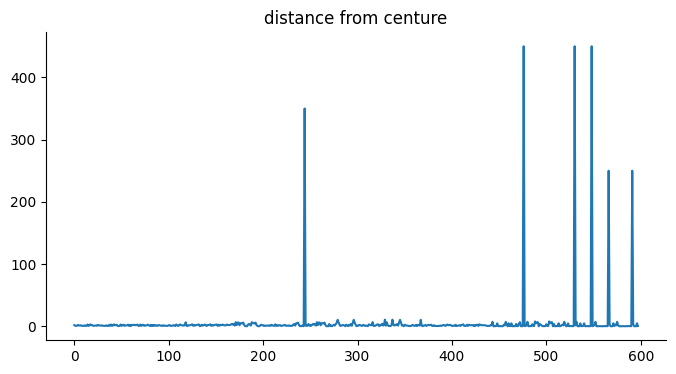

In [1248]:
# @title distance from centure

numerical_df['dfc'].plot(kind='line', figsize=(8, 4), title='distance from centure')
plt.gca().spines[['top', 'right']].set_visible(False)

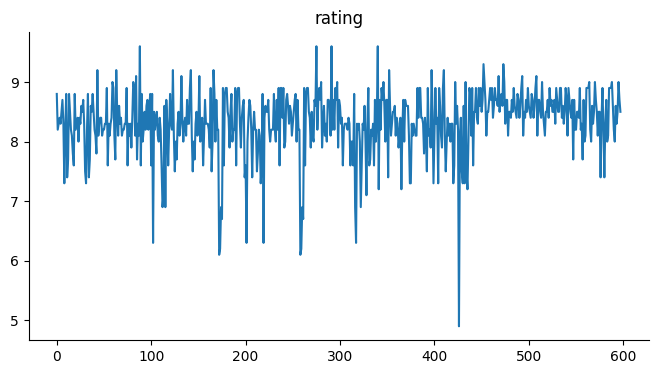

In [1249]:
# @title rating

numerical_df['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

In [1250]:
numerical_df.head()

,rating,quality_val,nights,adults,review,price,bed,dfc
0,8.8,3,1,1,1209,183,1.0,2.0
1,8.2,2,1,1,10745,104,1.0,0.9
2,8.3,2,1,1,5619,97,1.0,0.8
3,8.4,2,1,1,4502,97,1.0,0.9
4,8.3,2,1,1,6989,101,1.0,2.3


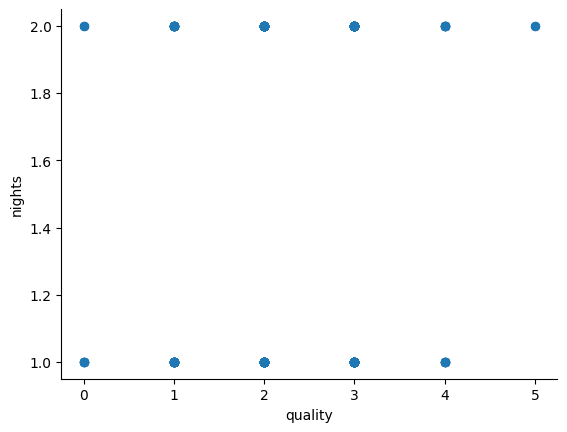

In [1251]:
# @title quality_val vs nights2

numerical_df.plot(kind='scatter', x='quality_val', y='nights', s=32, alpha=.8)
plt.ylabel("nights")
plt.xlabel("quality")
plt.gca().spines[['top', 'right',]].set_visible(False)

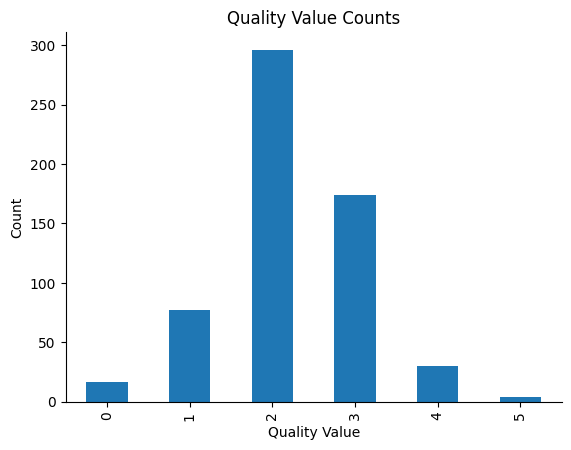

In [1252]:
# Calculate count of each unique value in 'quality_val' column
quality_val_counts = numerical_df['quality_val'].value_counts()

# Sort the quality_val_counts DataFrame by index (unique values of 'quality_val')
quality_val_counts = quality_val_counts.sort_index()
quality_val_counts.plot(kind='bar', title='Quality Value Counts')
plt.xlabel('Quality Value')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)

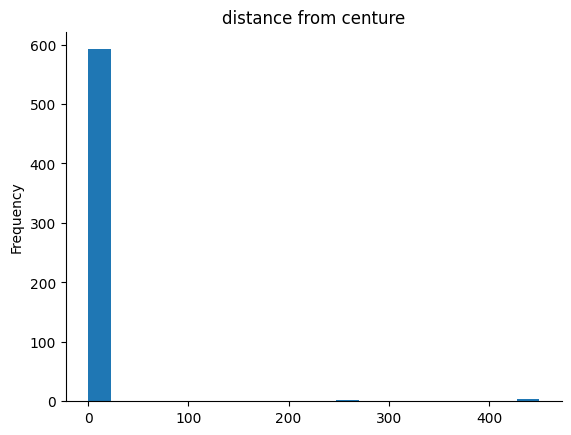

In [1253]:
# @title distance from centure

df['dfc'].plot(kind='hist', bins=20, title='distance from centure')
plt.gca().spines[['top', 'right',]].set_visible(False)

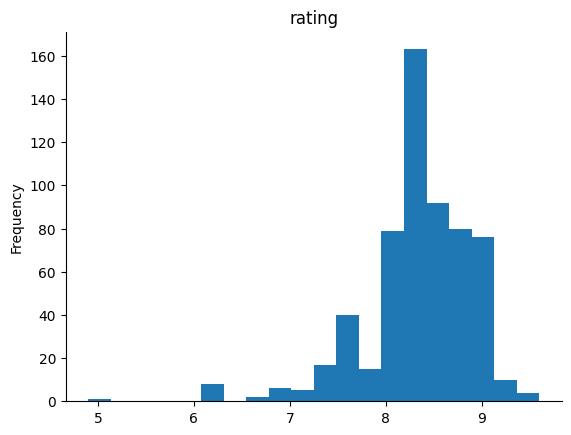

In [1254]:
# @title rating

df['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [1255]:
correlation_matrix = numerical_df.corr()

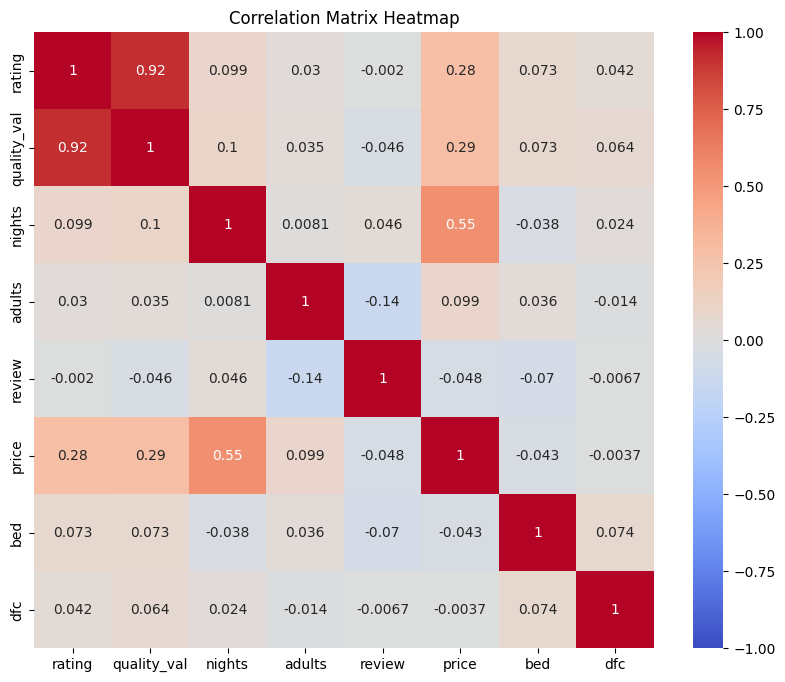

In [1256]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title and labels
plt.title('Correlation Matrix Heatmap')
plt.show()


In [1257]:
df[(df["nights"] == 1) & (df["adults"] == 2)].head()
main_df = df
df = df[(df["nights"] == 1) & (df["adults"] == 2)]

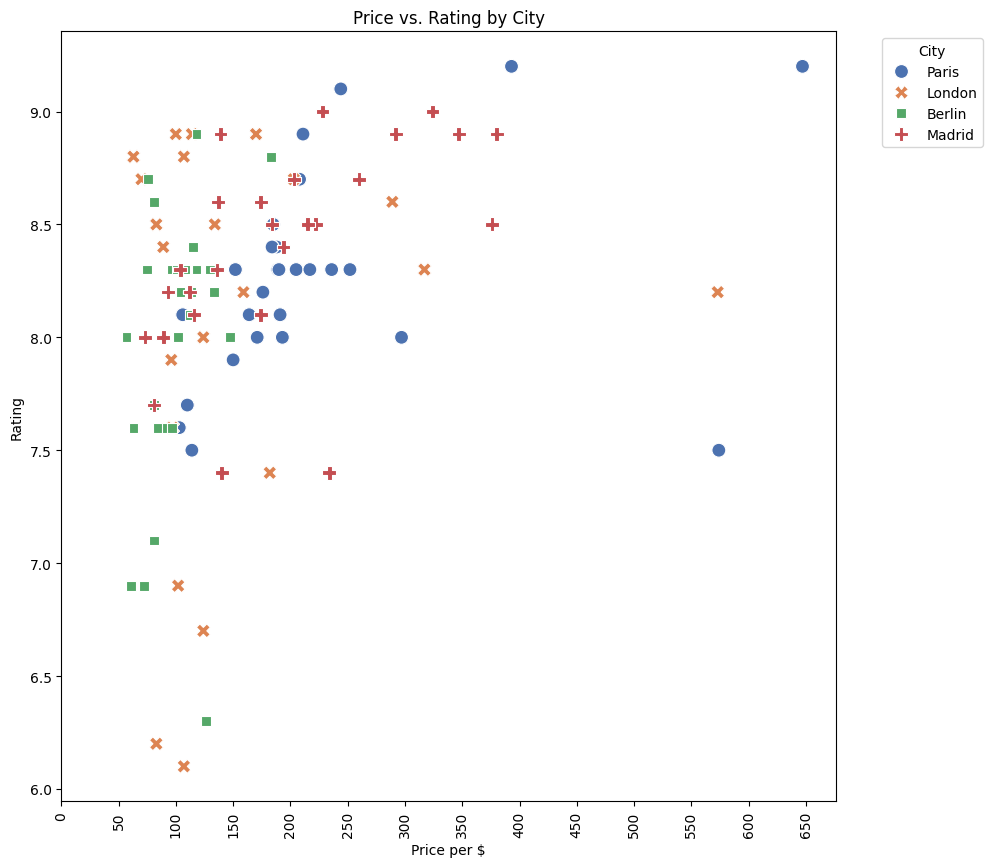

In [1258]:
def city_rating_price(df):
    plt.figure(figsize=(10, 10))
    scatter_plot = sns.scatterplot(data=df, x='price', y='rating', hue='city', style='city', palette='deep', s=100)

    # Add title and labels
    plt.title('Price vs. Rating by City')
    plt.xlabel('Price per $')
    plt.ylabel('Rating')
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(0, df['price'].max() + 50, 50))
    plt.xticks(rotation=90)
    # Show plot
    plt.show()
city_rating_price(df)

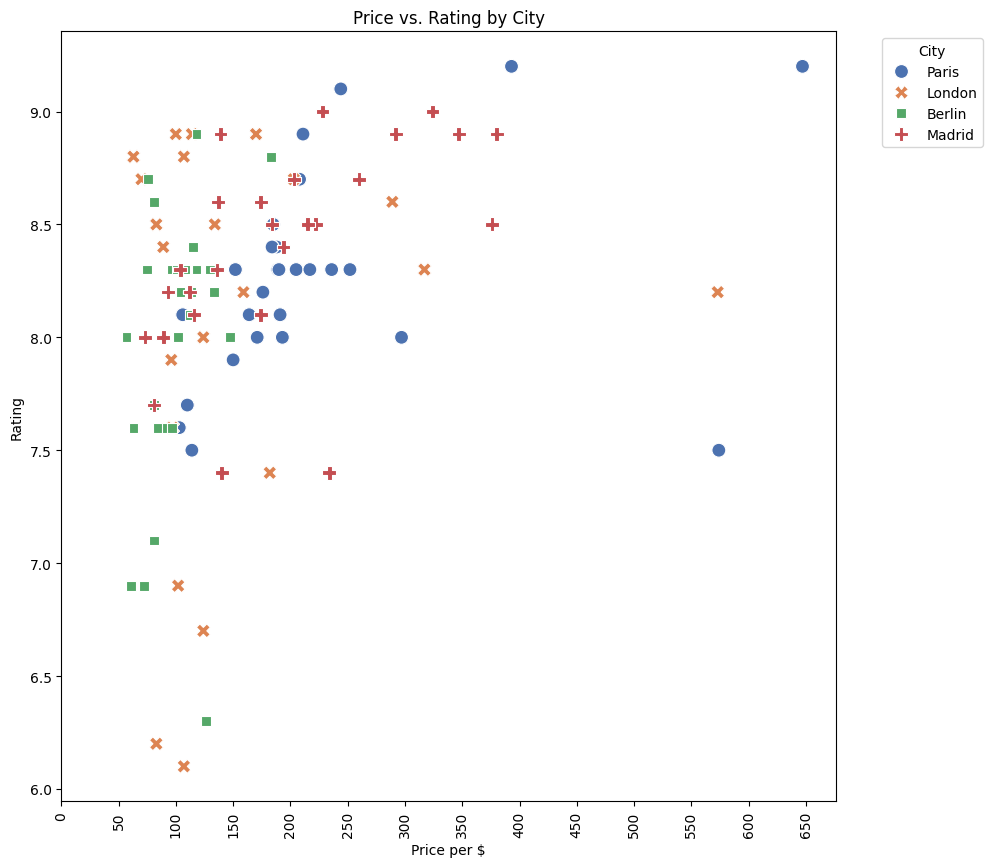

In [1259]:
city_rating_price(df[df['price'] < 1350])

In [1260]:
cities_wealth = (df).sort_values(by = ['rating'], ascending=False)
(cities_wealth.loc[:, ['city', 'rating']]).groupby(['city']).mean().sort_values(by = ['rating'], ascending=False)

,rating
city,
Madrid,8.455319
Paris,8.288636
London,8.175758
Berlin,8.002703


In [1261]:
cities_wealth = (df[df['price'] < 1350]).sort_values(by = ['price'], ascending=False)
(cities_wealth.loc[:, ['city', 'price']]).groupby(['city']).mean().sort_values(by = ['price'], ascending=False)

,price
city,
Paris,229.545455
Madrid,198.063830
London,153.878788
Berlin,100.432432


In [1262]:
cities_wealth.head(5)

,name,rating,quality,room_type,city,neighbourhood,quality_val,nights,adults,review,price,bed,dfc
123,Le Narcisse Blanc,9.2,Superb,Classic Double Room,Paris,7th arr.,4,1,2,577,647,1.0,1.9
142,Le Narcisse Blanc,9.2,Superb,Classic Double Room,Paris,7th arr.,4,1,2,577,647,1.0,1.9
125,Melia Paris Champs Elysées,7.5,Good,Junior Suite,Paris,16th arr.,1,1,2,357,574,1.0,3.2
144,Melia Paris Champs Elysées,7.5,Good,Junior Suite,Paris,16th arr.,1,1,2,357,574,1.0,3.2
170,JW Marriott Grosvenor House London,8.2,Very good,"Deluxe Room, Guest room, 1 Queen",London,Westminster Borough,2,1,2,1229,573,1.0,1.2


In [1263]:
london_df = df[df['city'] == 'London']
paris_df = df[df['city'] == 'Paris']
madrid_df = df[df['city'] == 'Madrid']
berlin_df = df[df['city'] == 'Berlin']

In [1264]:
def neighbourhood_price_rating(df):
    plt.figure(figsize=(8, 8))
    scatter_plot = sns.scatterplot(data=df, x='price', y='rating', hue='neighbourhood', style='neighbourhood', palette='deep', s=100)

    # Add title and labels
    plt.title('Price vs. Rating By Neighbourhood')
    plt.xlabel('Price per $')
    plt.ylabel('Rating')
    plt.legend(title='Neighbour', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(range(0, df['price'].max() + 60, 60))
    plt.xticks(rotation=90)
    # Show plot
    plt.show()

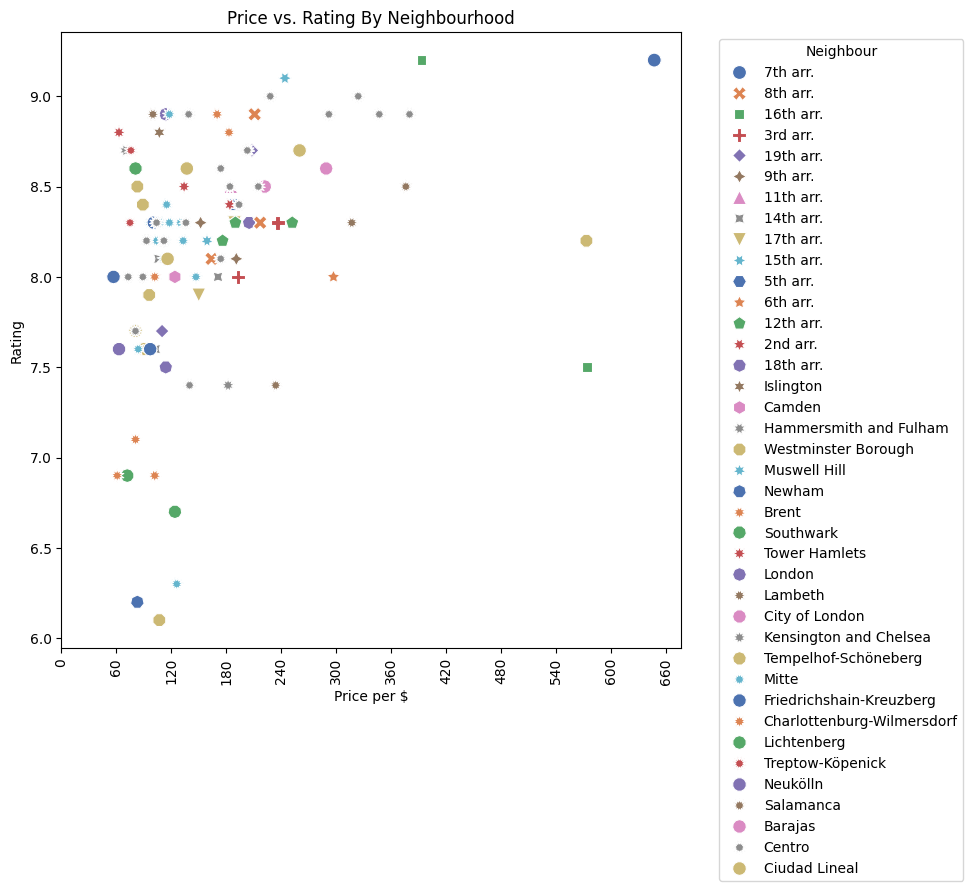

In [1265]:
neighbourhood_price_rating(df)

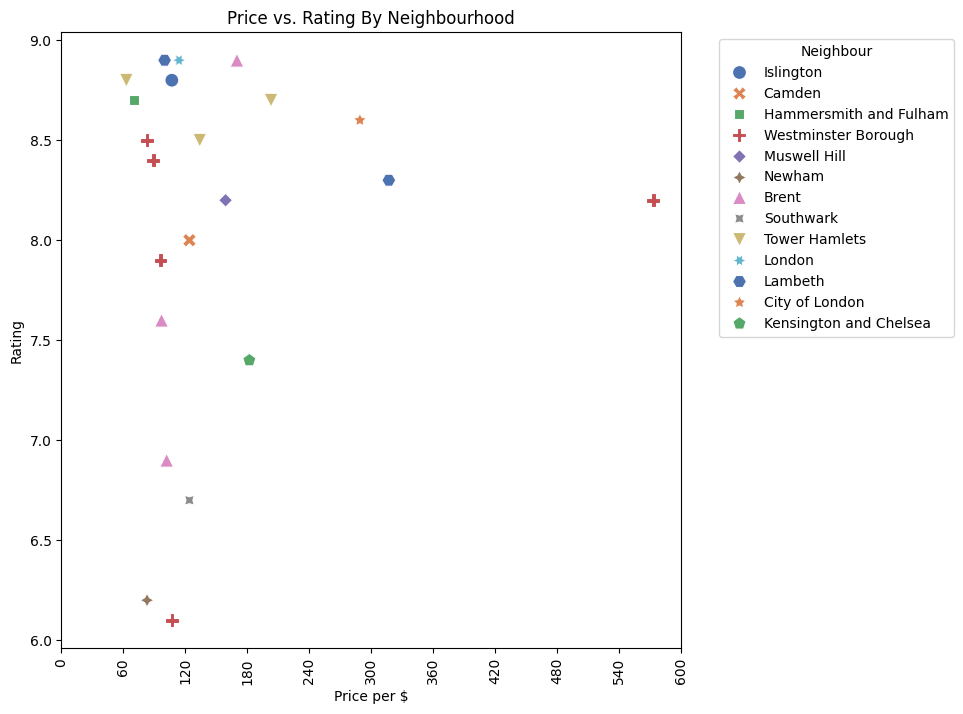

In [1266]:
neighbourhood_price_rating(london_df)

In [1267]:
cities_wealth = (london_df[london_df['price'] < 1350]).sort_values(by = ['price'], ascending=False)
(cities_wealth.loc[:, ['neighbourhood', 'price']]).groupby(['neighbourhood']).mean().sort_values(by = ['price'], ascending=False)

,price
neighbourhood,
City of London,289.000000
Westminster Borough,213.250000
Kensington and Chelsea,182.000000
Lambeth,172.333333
Muswell Hill,159.000000
Brent,127.200000
Camden,124.000000
Southwark,124.000000
Tower Hamlets,115.750000


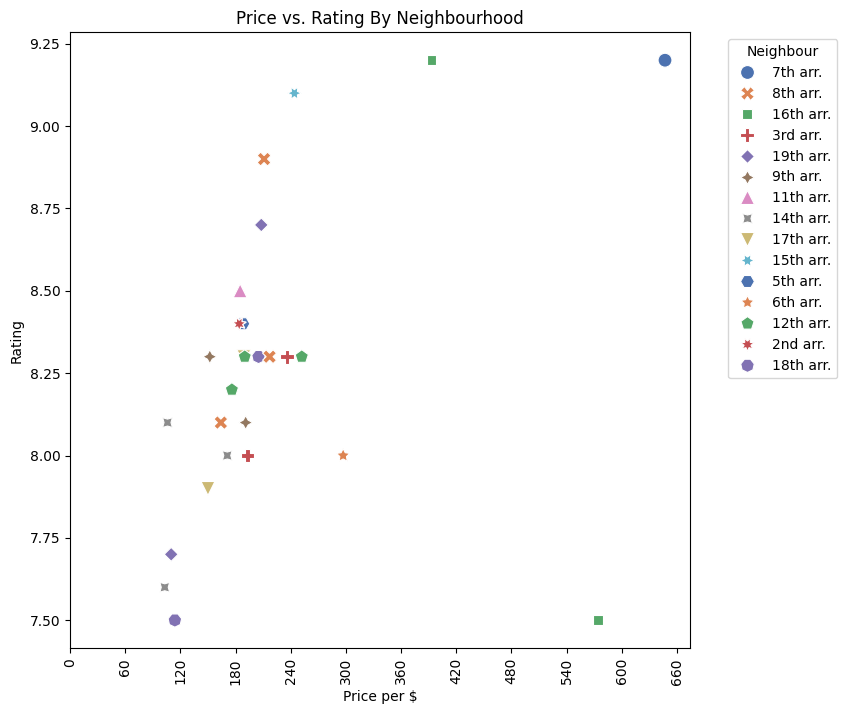

In [1268]:
neighbourhood_price_rating(paris_df)

In [1269]:
cities_wealth = (paris_df[paris_df['price'] < 1350]).sort_values(by = ['price'], ascending=False)
(cities_wealth.loc[:, ['neighbourhood', 'price']]).groupby(['neighbourhood']).mean().sort_values(by = ['price'], ascending=False)

,price
neighbourhood,
7th arr.,647.000000
16th arr.,513.666667
6th arr.,297.000000
15th arr.,244.000000
3rd arr.,207.333333
12th arr.,202.000000
8th arr.,193.400000
5th arr.,188.000000
11th arr.,185.000000


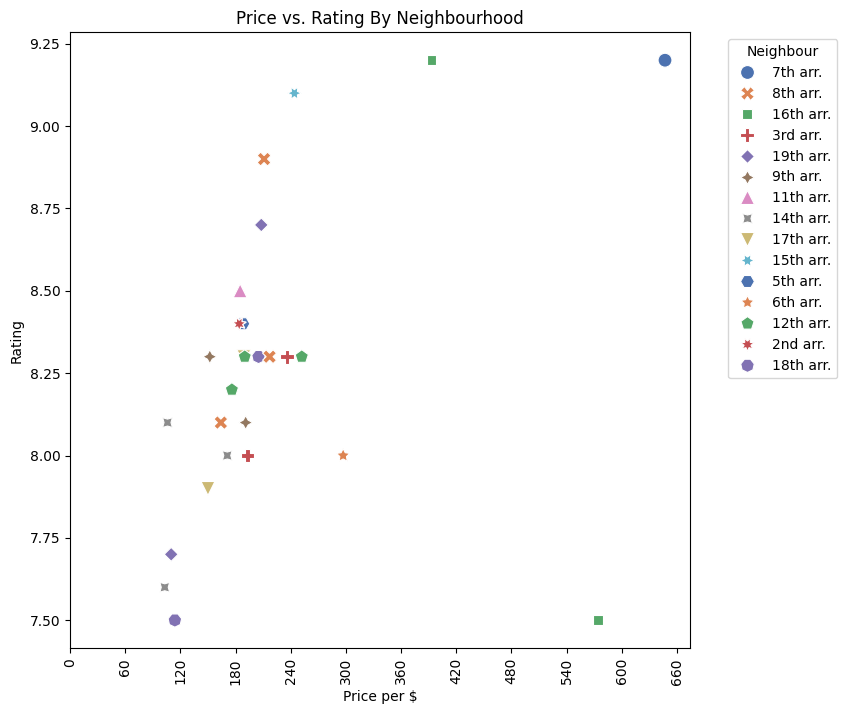

In [1270]:
neighbourhood_price_rating(paris_df[paris_df['price'] < 1800])

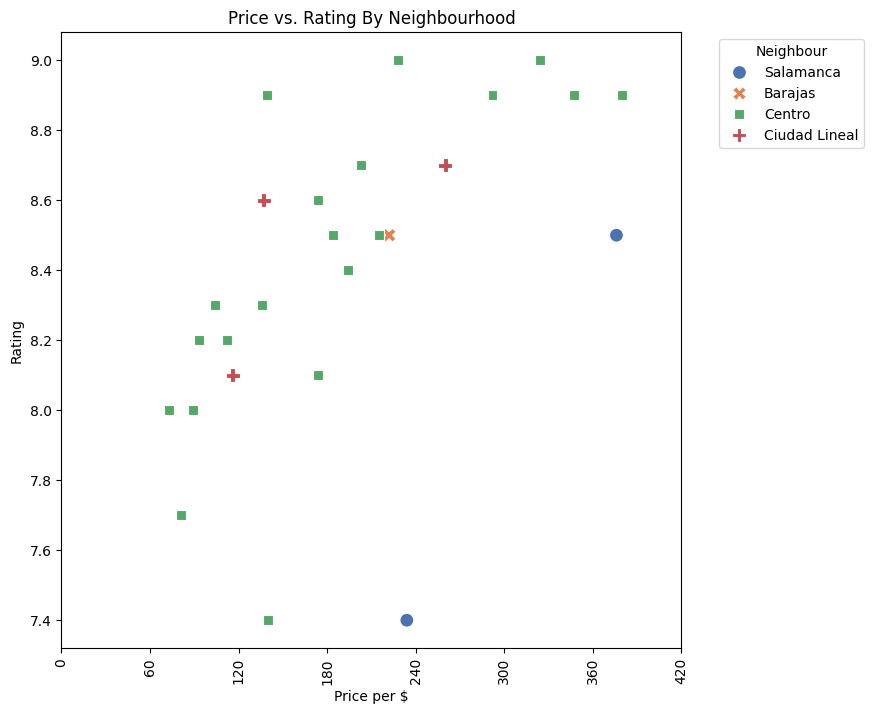

In [1271]:
neighbourhood_price_rating(madrid_df)

In [1272]:
cities_wealth = (madrid_df[madrid_df['price'] < 1350]).sort_values(by = ['price'], ascending=False)
(cities_wealth.loc[:, ['neighbourhood', 'price']]).groupby(['neighbourhood']).mean().sort_values(by = ['price'], ascending=False)

,price
neighbourhood,
Salamanca,328.666667
Barajas,222.000000
Centro,188.351351
Ciudad Lineal,182.000000


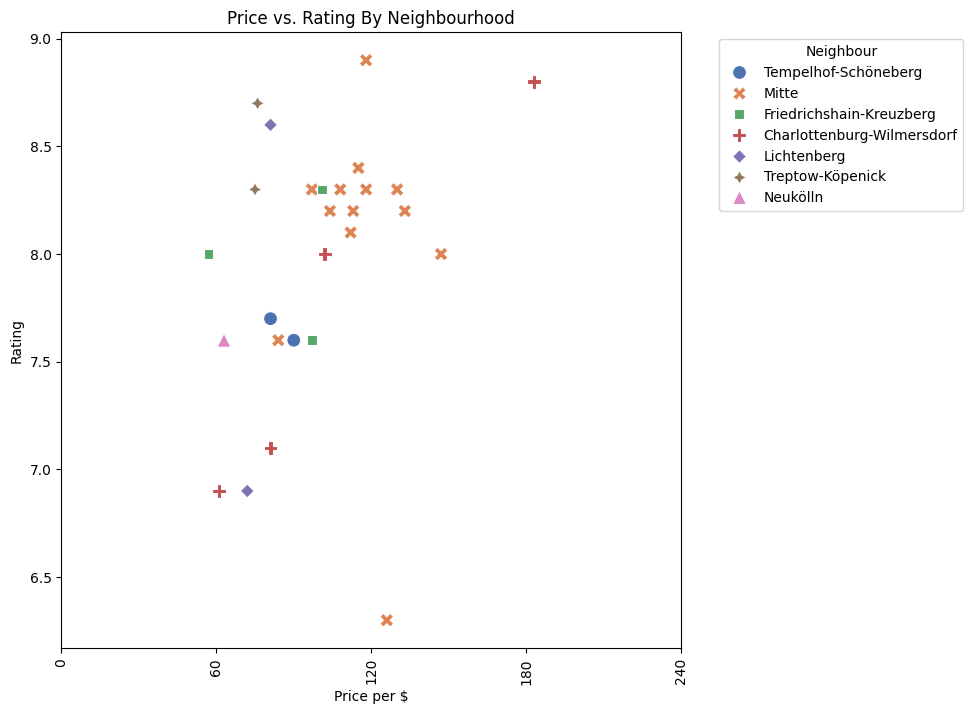

In [1273]:
neighbourhood_price_rating(berlin_df)

In [1274]:
cities_wealth = (berlin_df[berlin_df['price'] < 1350]).sort_values(by = ['price'], ascending=False)
(cities_wealth.loc[:, ['neighbourhood', 'price']]).groupby(['neighbourhood']).mean().sort_values(by = ['price'], ascending=False)

,price
neighbourhood,
Mitte,112.947368
Charlottenburg-Wilmersdorf,105.800000
Tempelhof-Schöneberg,87.000000
Friedrichshain-Kreuzberg,82.600000
Lichtenberg,76.500000
Treptow-Köpenick,75.500000
Neukölln,63.000000


In [1275]:
df = main_df

Text(0, 0.5, 'Number of Rows')

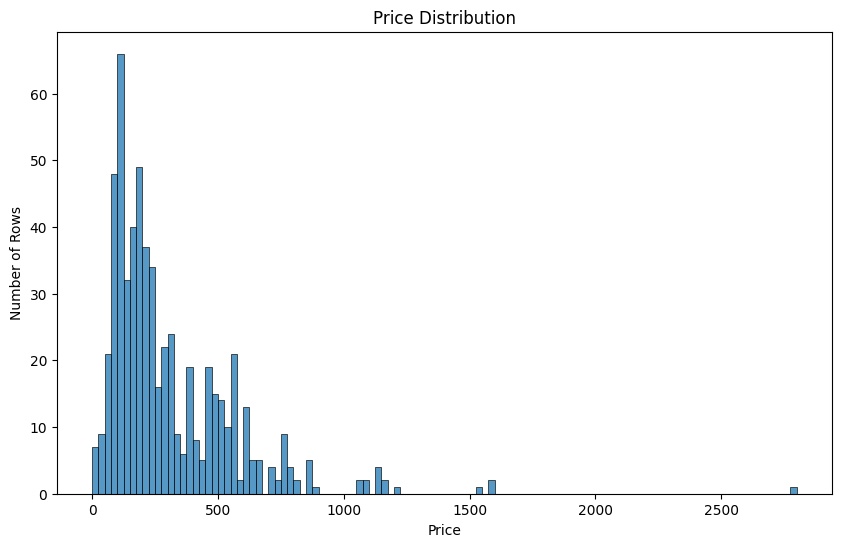

In [1276]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=range(0, max(df['price']) + 25, 25))
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Number of Rows')

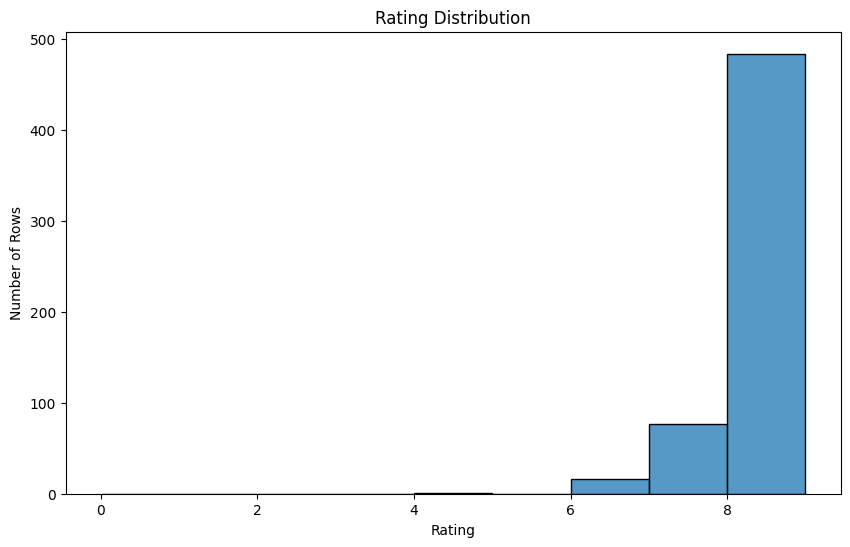

In [1277]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=range(0, 10))
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Rows')

plt.show()

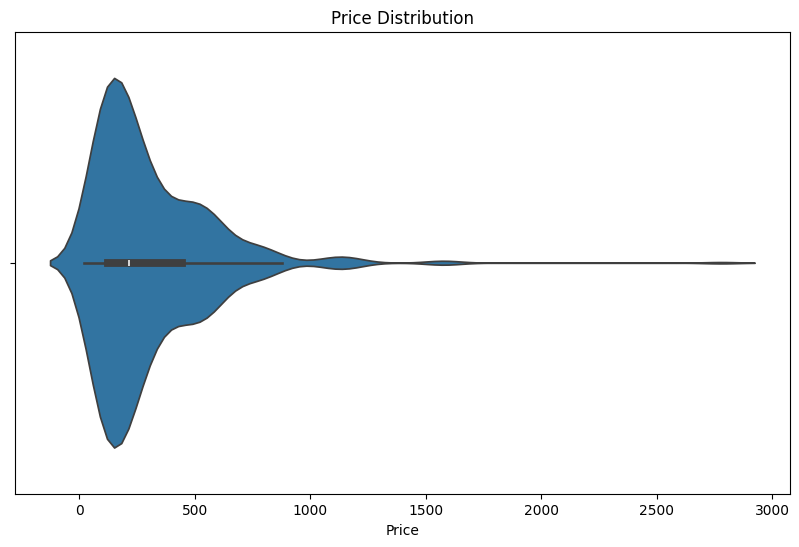

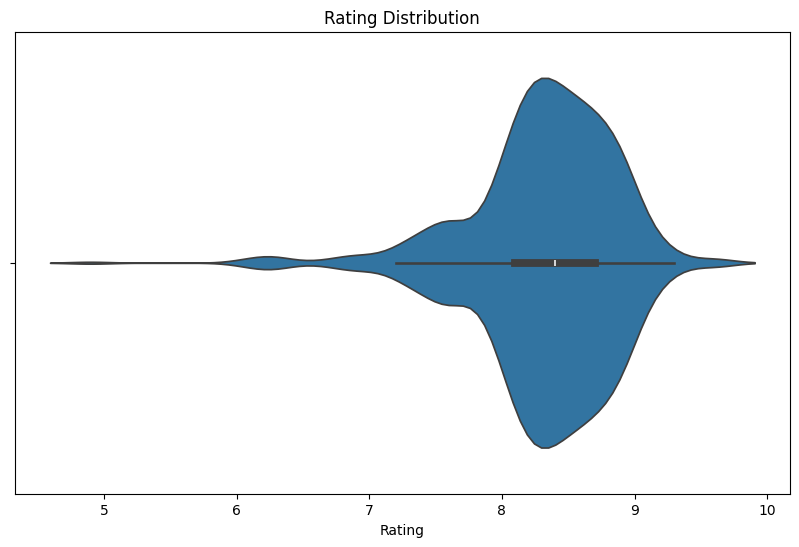

In [1278]:
# Create a violin plot for price
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='price')
plt.title('Price Distribution')
plt.xlabel('Price')

plt.show()

# Create a violin plot for rating
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='rating')
plt.title('Rating Distribution')
plt.xlabel('Rating')

plt.show()

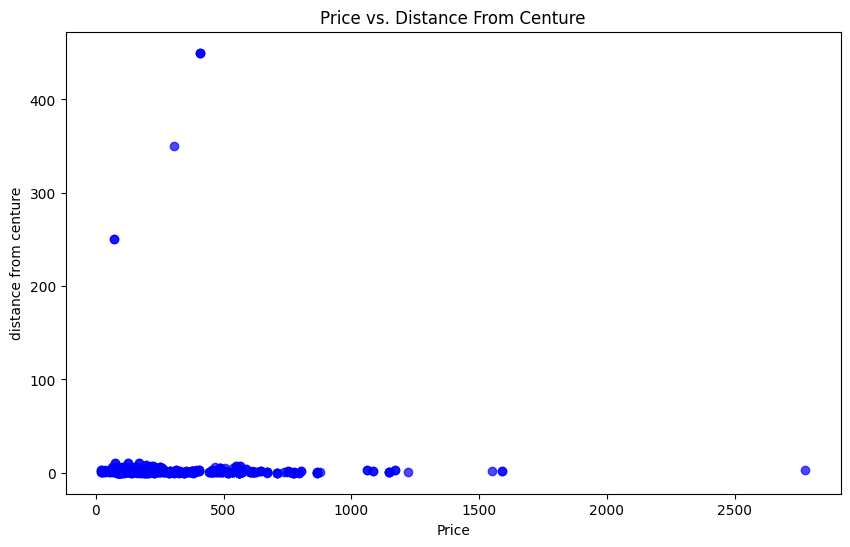

In [1279]:
distance_from_centure_less_than_50 = df[df['dfc']<50]
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['dfc'], color='blue', alpha=0.7)
plt.title('Price vs. Distance From Centure')
plt.xlabel('Price')
plt.ylabel('distance from centure')

plt.show()


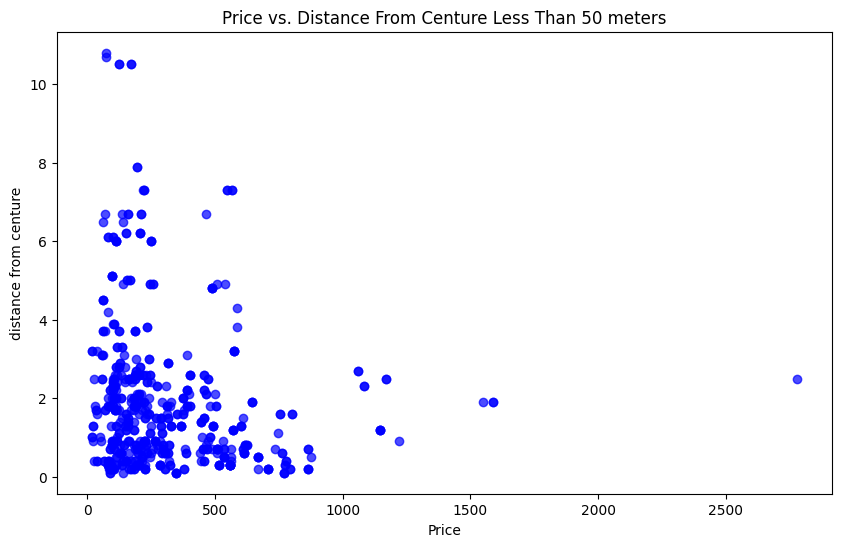

In [1280]:

plt.figure(figsize=(10, 6))
plt.scatter(df[df['dfc']<50]['price'], df[df['dfc']<50]['dfc'], color='blue', alpha=0.7)
plt.title('Price vs. Distance From Centure Less Than 50 meters')
plt.xlabel('Price')
plt.ylabel('distance from centure')

plt.show()


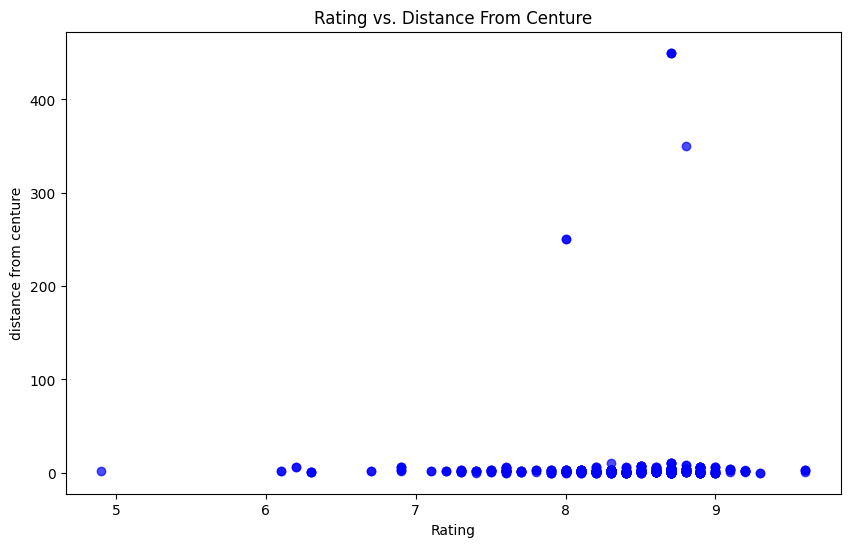

In [1281]:
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['dfc'], color='blue', alpha=0.7)
plt.title('Rating vs. Distance From Centure')
plt.xlabel('Rating')
plt.ylabel('distance from centure')

plt.show()


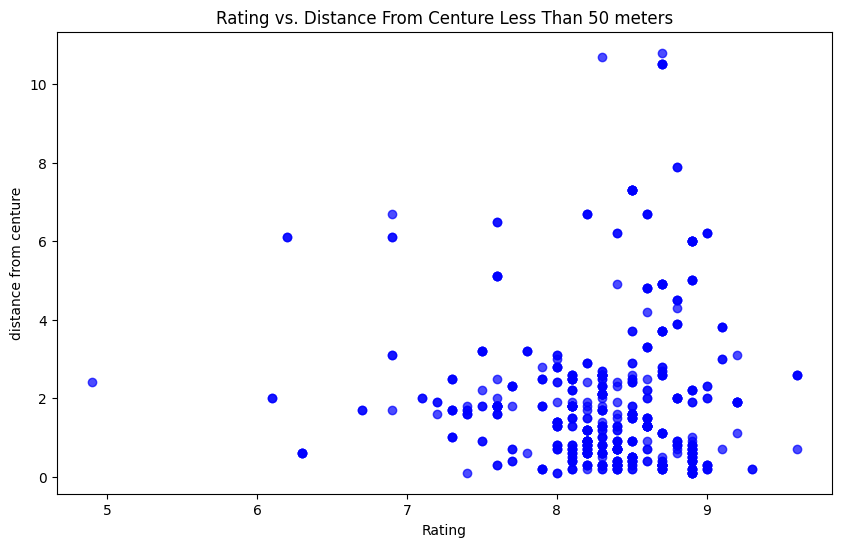

In [1282]:

plt.figure(figsize=(10, 6))
plt.scatter(df[df['dfc']<50]['rating'], df[df['dfc']<50]['dfc'], color='blue', alpha=0.7)
plt.title('Rating vs. Distance From Centure Less Than 50 meters')
plt.xlabel('Rating')
plt.ylabel('distance from centure')

plt.show()


In [1283]:
df['room_type'].unique()

array(['King Room', 'Standard Double or Twin Room', 'Small Double Room',
       'Single Room', 'Standard Double Room',
       'Superior Double or Twin Room', 'Room with King Size bed',
       'Bed in 8-Bed Dormitory Room', 'Comfort Room', 'Double Room',
       'Twin Room', 'King Studio with Sofa Bed',
       'Queen Room - Mobility Access',
       'Bed in 8-Bed Mixed Dormitory Room with Private Bathroom',
       'Bed in 6-Bed Mixed Dormitory Room', 'Cosy Small Room',
       'Queen Room',
       'Bed 8-Bed Mixed Dormitory Room with Private Bathroom',
       'Deluxe Room', 'Small Single Room', 'Superior Double Room',
       'Comfort Double Room', 'Classic Double Room', 'Classic Room',
       '"Cosy" Room', 'Deluxe King Room',
       'Classic King Room - Garden Side',
       'Executive – Passion Sensorial Shower', 'Queen Bed Double Room',
       'Classic double room', 'Deluxe Queen Studio',
       'Art Deco Queen, Guest room, 1 Queen', 'Studio',
       'One-Bedroom Apartment', 'Deluxe Apar

C:\Users\User\AppData\Local\Temp\ipykernel_19052\2096004849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='bed', y='review', palette='viridis')


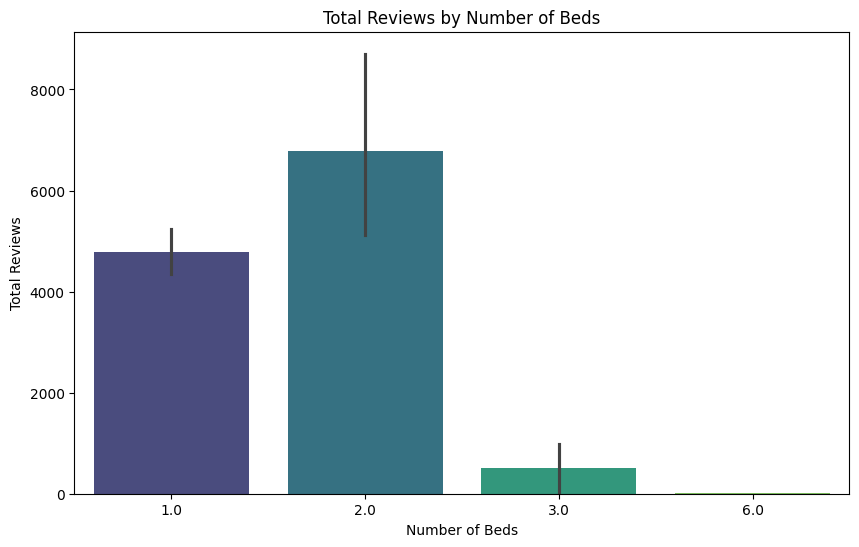

In [1284]:
# Create a bar plot for reviews and number of beds
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='bed', y='review', palette='viridis')
plt.title('Total Reviews by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Total Reviews')

plt.show()

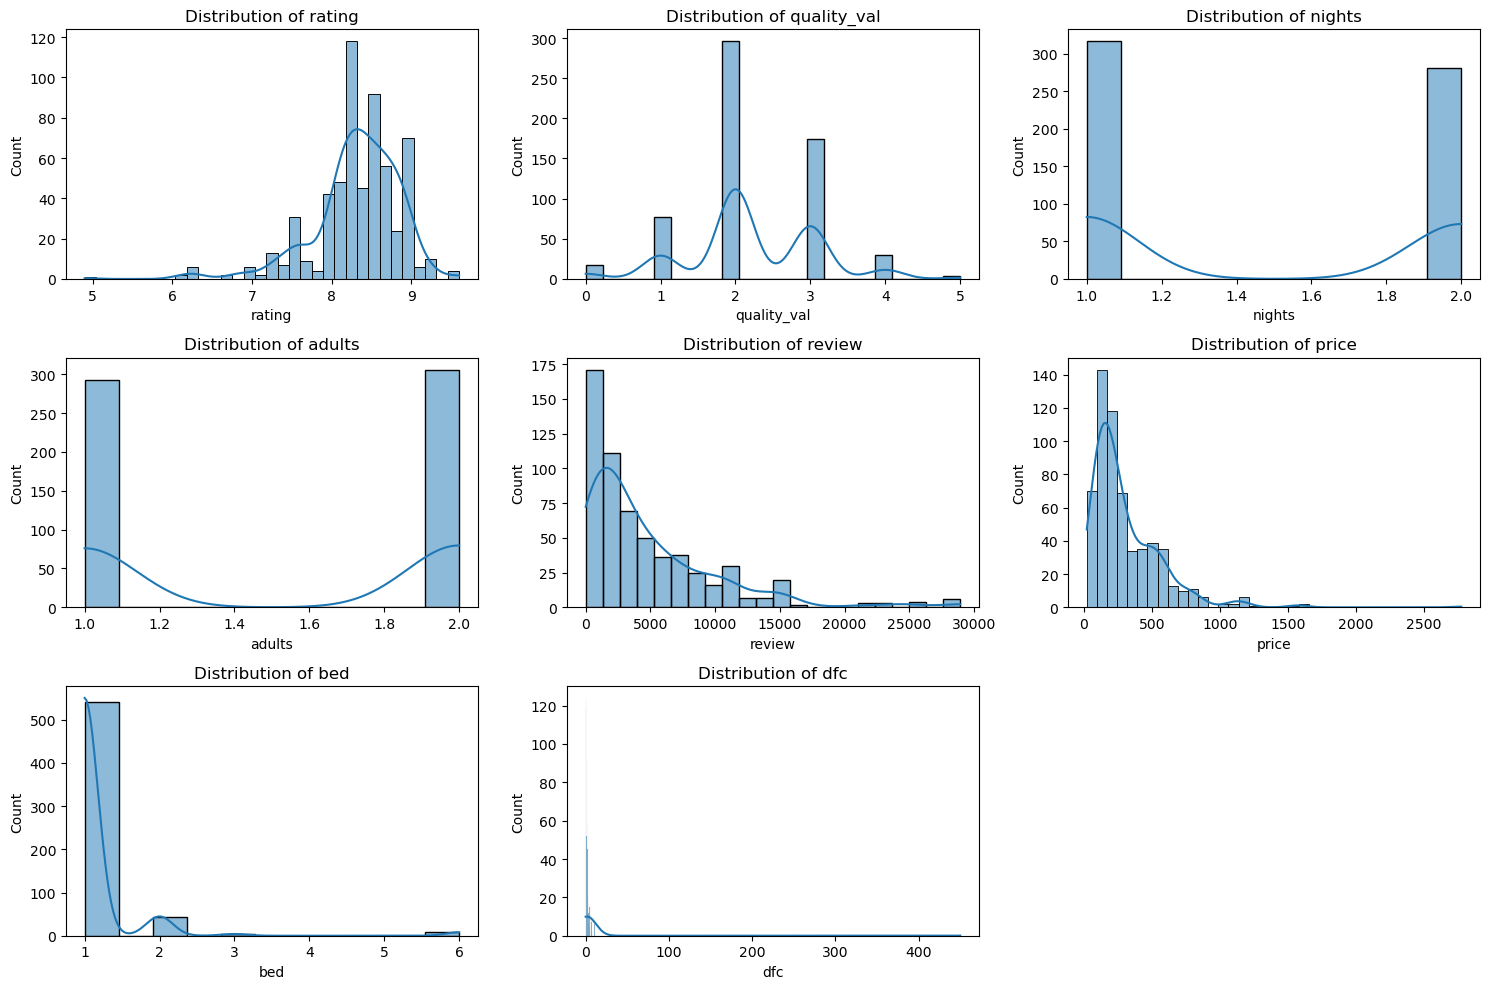

In [28]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [43]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(df, columns=['name', 'room_type', 'city', 'neighbourhood', 'bed'], drop_first=True)

numerical_cols = ['rating', 'quality_val', 'nights', 'adults', 'dfc']

X = df_encoded.drop(columns=['price' , 'quality'])
y = df_encoded['price']

scaler = MinMaxScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

X = sm.add_constant(X)
X = X.astype(float)

model = sm.OLS(y, X).fit()
price_model_summary = model.summary()
print(price_model_summary)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     42.12
Date:                Tue, 28 May 2024   Prob (F-statistic):          3.78e-178
Time:                        01:27:19   Log-Likelihood:                -3166.2
No. Observations:                 598   AIC:                             6818.
Df Residuals:                     355   BIC:                             7886.
Df Model:                         242                                         
Covariance Type:            nonrobust                                         
                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------